# __APARTADO C__


Antes de empezar vamos a cargar los datos del CSV que nos ha tocado.  
Empezaremos con la carga de las librerias necesarias.

In [91]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [92]:
DATA_DIR = 'data/insurance.csv'

def read_database(dir : str):
    return pd.read_csv(dir, delimiter= ',')

df = read_database(DATA_DIR)
print(df.head(5))
print(df.describe())
print(df.info())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Colu

Podemos ver que tenemos 2 columnas decimales que es el bmi y los costes. 2 columnas con valores enteros, age y children. Por ultimo tenemos 3 columnas categoricas smoker, region, sex.

Sabiendo esta informacion vamos a ver la cantidad de gente fumadora.

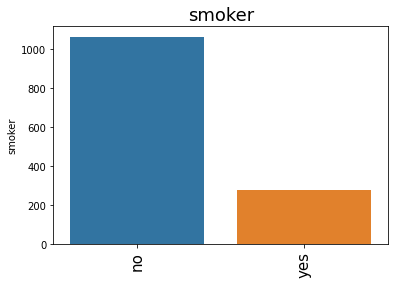

In [93]:
def barplot_gen(df_colum : pd.Series, ax = plt.subplot()):
    classes = df_colum.value_counts()
    class_len = len(classes)
    sns.barplot(x=np.arange(class_len), y=classes, ax = ax)
    ax.set_xticks(np.arange(len(classes)))
    ax.set_xticklabels(classes.index.values.tolist(), rotation=90, fontsize=15)
    ax.set_title(df_colum.name, fontsize=18)

barplot_gen(df['smoker'])

Podemos observar que la cantidad de fumadores en esta base de datos es muy baja, por lo que si queremos realizar una prediccion de esta atributo tendremos problemas para poder realizar un entrenamiento del modelo de red neuronal. Al tratarse en esta practica de utilizar un modelos de regresion lineal y ser valores categoricos, vamos a descartar este valor para realizar la prediccion.

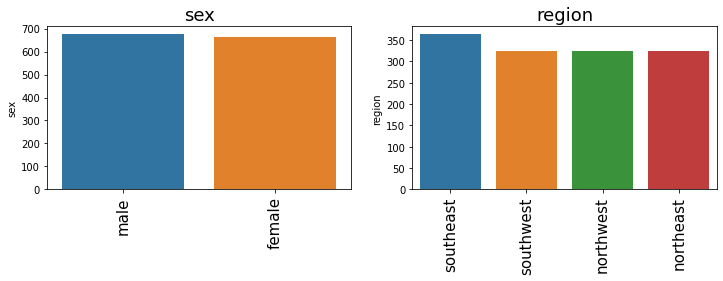

In [94]:
fig, p = plt.subplots(ncols=2, figsize=(12, 3))

barplot_gen(df['sex'], ax = p[0])
barplot_gen(df['region'], ax = p[1])

Una vez visto los valores categoricos podemos descartar smoker como a valor a predecir, ya que tenemos pocos datos de valores de fumadores. Pero en cambio si queremos hacer una regresion logistica podemos utilizar sex.

Ahora vamos a ver los valores no categoricos.

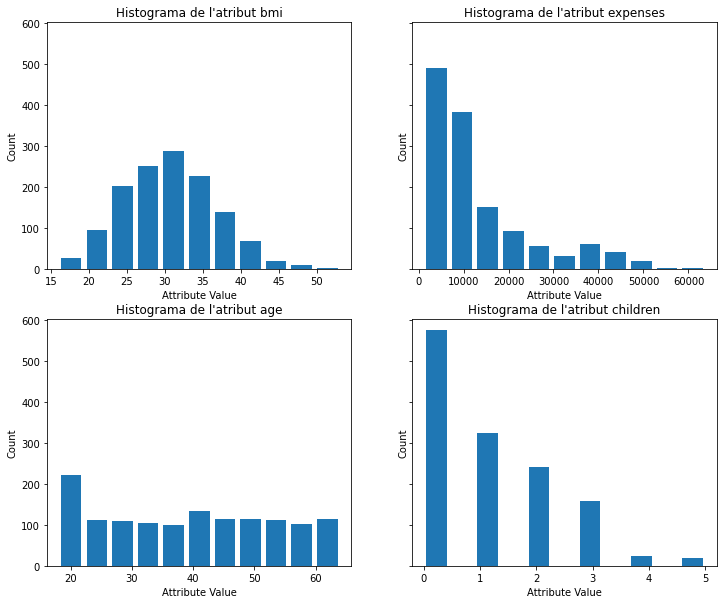

In [95]:
def hist_gen(ax, df_colum : pd.Series):
    ax.set_title(f"Histograma de l'atribut {df_colum.name}")
    ax.set_xlabel("Attribute Value")
    ax.set_ylabel("Count")
    ax.hist(df_colum, bins=11, range=[np.min(df_colum), np.max(df_colum)], histtype="bar", rwidth=0.8)

fig, p = plt.subplots(2, 2, sharey=True, figsize=(12, 10))

hist_gen(p[0,0], df['bmi'])
hist_gen(p[0,1], df['expenses'])
hist_gen(p[1,0], df['age'])
hist_gen(p[1,1], df['children'])

Podemos observar que hay un atributo que si tiene una distribucion Guassiana, en este caso es el atributo bmi.

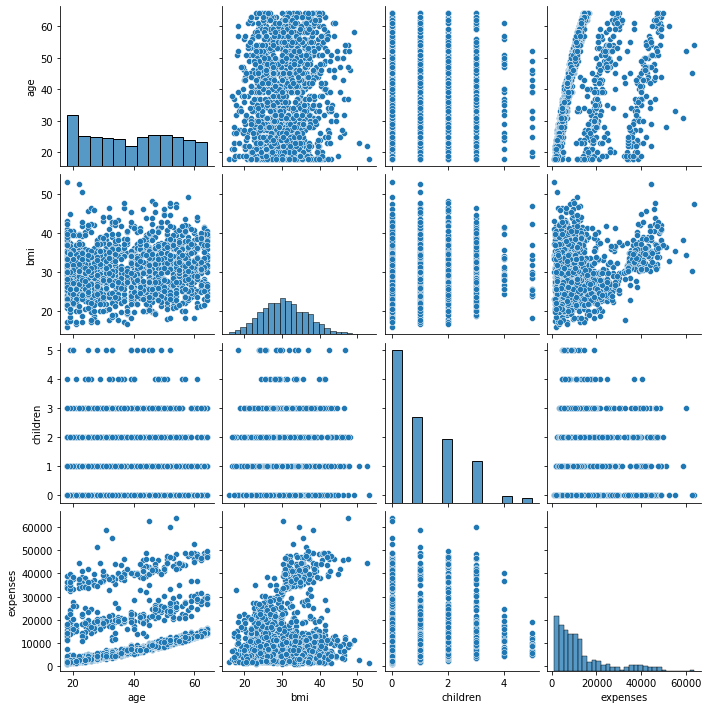

In [96]:
relacio = sns.pairplot(df)

In [97]:
def caregorical_to_onehot_encode(df, col):
    dummy = pd.get_dummies(df[col]) 
    df = df.drop(col, axis = 1) 
    return pd.concat([df, dummy], axis = 1)

def object_to_number(df, column, value):
    df_tmp = df[column].apply(lambda x: 1 if x == value else 0)
    df = df.drop(column, axis = 1) 
    return pd.concat([df, df_tmp], axis = 1)

df = object_to_number(df, 'sex', 'male')
df = object_to_number(df, 'smoker', 'yes')

df = caregorical_to_onehot_encode(df, 'region')

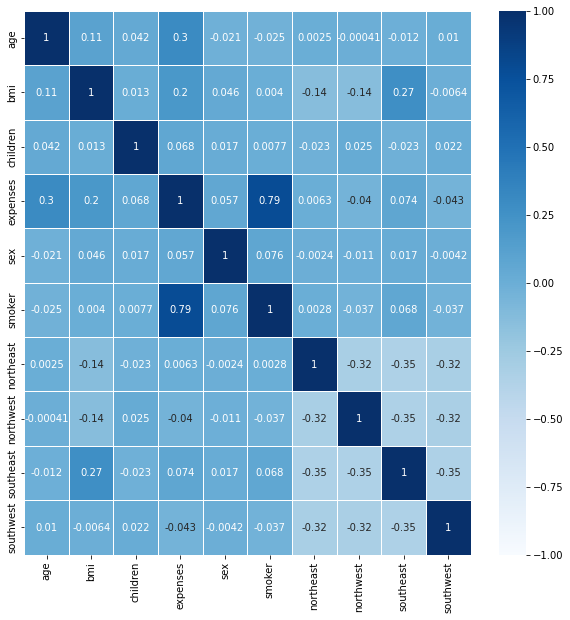

In [98]:
correlacio = df.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(correlacio, annot=True, vmin=-1, linewidths=.5, cmap=plt.cm.Blues)

In [99]:
df.groupby("smoker").expenses.agg(["mean","median","count"])

,mean,median,count
smoker,,,
0,8434.268449,7345.405,1064
1,32050.231971,34456.350,274


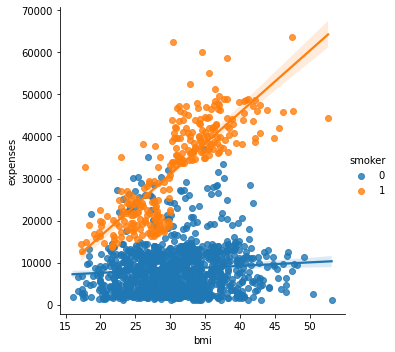

In [100]:
sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df)

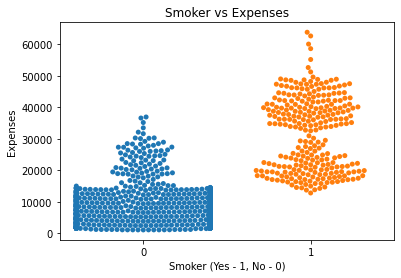

In [101]:
ax = sns.swarmplot(x=df['smoker'], y=df['expenses'])
ax.set_title("Smoker vs Expenses")
plt.xlabel("Smoker (Yes - 1, No - 0)")
plt.ylabel("Expenses")
plt.show(ax)

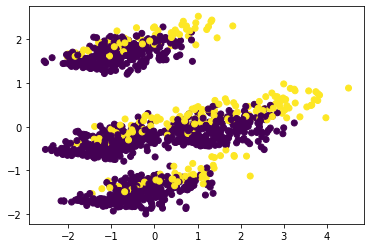

In [102]:
def show_3d_plot(df, column):
    y = df[column].to_numpy()
    X = df.drop([column], axis="columns").to_numpy()
    
    scaler = StandardScaler()
    X_s = scaler.fit_transform(X)

    pca=PCA(n_components=3)
    X_train_3dim = pca.fit_transform(X_s)

    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    ax.scatter(X_train_3dim[:,0], X_train_3dim[:,1], X_train_3dim[:,2], c=y)

    plt.show()

def show_2d_plot(df, column):
    y = df[column].to_numpy()
    X = df.drop([column], axis="columns").to_numpy()
    
    scaler = StandardScaler()
    X_s = scaler.fit_transform(X)
    
    pca=PCA(n_components=2)
    X_train_3dim = pca.fit_transform(X_s)

    plt.scatter(X_train_3dim[:,0],X_train_3dim[:,1], c=y)
    plt.show()

show_2d_plot(df, 'smoker')

__1. Quin és el tipus de cada atribut?__  

0.   age  int64
1.   sex  object
2.   bmi  float64
3.   children int64 
4.   smoker  object
5.   region object
6.   expenses float64


__2. Quins atributs tenen una distribució Gaussiana?__  

BMI  

__3. Quin és l'atribut objectiu? Per què?__

Leyendo el extracto de Kaggle y entendiendo el objetivo de la empresa, el cual es otorgar Seguros Médicos. Podemos llegar a suponer que la variable objetivo es la de "expenses", debido a que esta expresa el gasto que tiene cada persona según su actual situación.

# __APARTADO B__


In [103]:
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_test = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_test = x[indices_test, :]
    y_test = y[indices_test]
    return x_train, y_train, x_test, y_test

In [104]:
y = df['expenses'].to_numpy().astype('int')
x = df.drop(['expenses'], axis="columns").to_numpy()

# Dividim dades d'entrenament
x_train, y_train, x_test, y_test = split_data(x, y)

stndScal = StandardScaler()

x_train = stndScal.fit_transform(x_train)
x_test = stndScal.transform(x_test)

error_np = np.zeros(x_train.shape[1])

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_test[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_test, regr.predict(x_v)) # calculem error
    error_np[i] = error
    r2 = r2_score(y_test, regr.predict(x_v))

    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))



Error en atribut 0: 136518575.731943
R2 score en atribut 0: 0.124696
Error en atribut 1: 155243008.707264
R2 score en atribut 1: 0.004642
Error en atribut 2: 159657292.915678
R2 score en atribut 2: -0.023661
Error en atribut 3: 156988501.433668
R2 score en atribut 3: -0.006549
Error en atribut 4: 68928397.920469
R2 score en atribut 4: 0.558058
Error en atribut 5: 156925839.923613
R2 score en atribut 5: -0.006148
Error en atribut 6: 156310880.057325
R2 score en atribut 6: -0.002205
Error en atribut 7: 154798201.954935
R2 score en atribut 7: 0.007494
Error en atribut 8: 156256673.245956
R2 score en atribut 8: -0.001857


Així es podrà contestar a aquestes **preguntes**:

__1. Quin són els atributs més importants per fer una bona predicció?__

Los atributos mas importantes para realizar una buena prediccion son aquellos que tienen un R2 score mas priximos a 1.
Amb l'atribut 5, el qual representa si una persona fuma o no.

__2. Amb quin atribut s'assoleix un MSE menor?__

Al igual que amb el punt anterior la dada que assoleix un MSE menor torna a ser amb Fuma/NoFuma.

__3. Quina correlació hi ha entre els atributs de la vostra base de dades?__


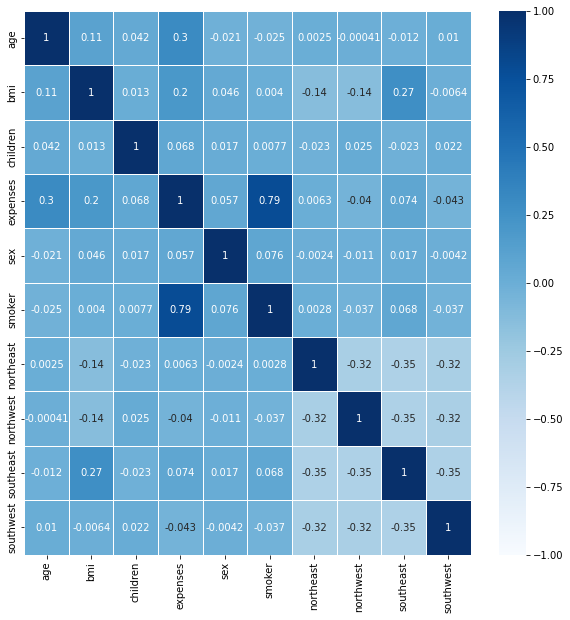

In [105]:
correlacio = df.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(correlacio, annot=True, vmin=-1, linewidths=.5, cmap=plt.cm.Blues)

__4. Com influeix la normalització en la regressió?__

Al aplicar o no la normalització amb el codi de regressió per cada atribut, no veiem cap tipus de diferencia notable. Es pot veure representat a les dades que obtenim, el cual un grup de dades es normalitzat i l'altre no:

Normalitzat

    Error en atribut 0: 136729701.887394
    R2 score en atribut 0: 0.085793
    Error en atribut 1: 144398962.222739
    R2 score en atribut 1: 0.034515
    Error en atribut 2: 150832999.845080
    R2 score en atribut 2: -0.008505
    Error en atribut 3: 148505236.561044
    R2 score en atribut 3: 0.007059
    ...

No Normalitzat

    Error en atribut 0: 154362562.313404
    R2 score en atribut 0: 0.077867
    Error en atribut 1: 158050629.119420
    R2 score en atribut 1: 0.055835
    Error en atribut 2: 169352454.392374
    R2 score en atribut 2: -0.011680
    Error en atribut 3: 166756610.473905
    R2 score en atribut 3: 0.003827
    ...


__5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?__

L'error R2 millora molt, ja que només utilitzem els atributs que superen un desitjat threshold, com per exemple "fuma", que ens dona un R2 superior a 0.5.

In [106]:
y = df['expenses'].to_numpy().astype('int')
x = df.drop(['expenses'], axis="columns").to_numpy()

# Dividim dades d'entrenament
x_train, y_train, x_test, y_test = split_data(x, y)

stndScal = StandardScaler()

x_train = stndScal.fit_transform(x_train)
x_test = stndScal.transform(x_test)

regr = regression(np.reshape(x_train[:,4],(x_train[:,4].shape[0],1)), y_train)    
error = mse(y_test, regr.predict(np.reshape(x_test[:,4],(x_test[:,4].shape[0],1)))) # calculem error
r2 = r2_score(y_test, regr.predict(np.reshape(x_test[:,4],(x_test[:,4].shape[0],1))))

print("Error: ", error, " R2: ", r2)

Error:  55671798.93628485  R2:  0.5938616637362986


__6. Si s'aplica un PCA, a quants components es redueix l'espai? Per què?__

Es redueix a tants com es refereixi al parametre n_components de PCA(). Però també podem trobar variables que podem assignar al parametre n_components, com per exemple 'mle', el qual destria els atributs més significatius. El perquè tria el número que tria al valor 'mle' ho hem trobat a un 'paper'. <ins> https://tminka.github.io/papers/pca/minka-pca.pdf </ins>

In [107]:
y = df['expenses'].to_numpy()
X = df.drop(['expenses'], axis="columns").to_numpy()

print(X.shape)

scaler = StandardScaler()
X_s = scaler.fit_transform(X)
X_t = scaler.fit_transform(x_train)

pca=PCA(n_components='mle', svd_solver='full')

X_train_3dim = pca.fit_transform(X_s)
X_train_3dim_t = pca.fit_transform(X_t)

print("Shape: ", X_train_3dim.shape)
print("Shape: ", X_train_3dim_t.shape)

(1338, 9)
Shape:  (1338, 8)
Shape:  (1070, 8)


In [108]:
y = df['expenses'].to_numpy().astype('int')
X = df.drop(['expenses'], axis="columns").to_numpy()

scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# PCA no presenta variabilitat al resultat
pca=PCA(n_components='mle', svd_solver='full')
X_train_3dim = pca.fit_transform(X_s)

# Dividim dades d'entrenament
x_train, y_train, x_test, y_test = split_data(X_s, y)

regr = regression(x_train, y_train)    
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))

print("error: ", error, "\nR2: ", r2, "\nx3: ", X_train_3dim.shape)

error:  44113663.71580091 
R2:  0.7788151184454485 
x3:  (1338, 8)


# APARTADO A

In [148]:
from numpy.linalg import inv

class GradientDescent():
    theta = None
    m = None
    n = None
    
    def learn(self, X, y, lr):
        hx = np.dot(X, self.theta) 
        J = np.dot(X.T,hx - y)/self.m    
        self.theta = self.theta - np.dot(lr, J)    
        return self.theta
    
    def fit(self, X, y, itr, lr):
        self.m, self.n = X.shape
        
        ones = np.ones((self.m, 1))
        X = np.concatenate((ones, X), axis=1)
        self.theta = np.zeros((self.n+1,1))
    
        for i in range(itr):
            self.theta = self.learn(X, y, lr)
    
    def predict(self, X):
        
        X = np.array(X) 
        m,n = X.shape
        ones = ones = np.ones((m, 1))
        X = np.concatenate((ones, X), axis=1)
        
        return np.dot(self.theta.T, X.T)[:, 0]

    def _fit(self, X, y):
        X = np.array(X) 
        m,n = X.shape
        ones = ones = np.ones((m, 1))
        X = np.concatenate((ones, X), axis=1)
        self.theta = np.dot(np.dot(inv(np.dot(X.T, X)),X.T), y)

In [ ]:
a = GradientDescent()
a.fit(x_train, y_train, 1000, 0.1)
a.theta

array([[ 2.58500000e+03,  1.43490000e+04,  8.12400000e+03, ...,
         1.34570000e+04,  9.10100000e+03,  2.21920000e+04],
       [-7.92887576e-14, -5.29580054e-14, -5.01982031e-14, ...,
        -9.92529772e-14, -1.52226015e-13, -2.01194961e-13],
       [-1.29258000e-13, -4.68213116e-13, -2.33374554e-13, ...,
        -4.71099429e-13, -4.81668330e-13, -9.54755156e-13],
       ...,
       [ 1.22263919e-13,  5.42011105e-13,  2.58890694e-13, ...,
         5.56788323e-13,  5.32126393e-13,  1.03500634e-12],
       [ 1.03624604e-13,  6.13629867e-13,  2.97287403e-13, ...,
         5.89340219e-13,  5.30248020e-13,  1.12033648e-12],
       [ 8.60740243e-14,  5.33906221e-13,  2.91502755e-13, ...,
         5.21738636e-13,  5.89079543e-13,  1.12941619e-12]])

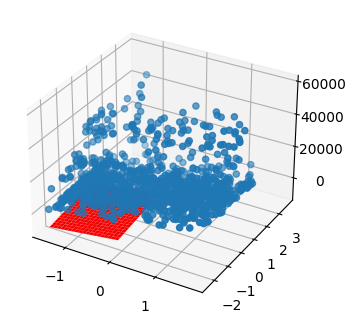

In [149]:
# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
# generem dades 3D d'exemple
x_val = x_train
y_val = y_train
a = GradientDescent()
a.fit(x_val, y_val, 1000, 0.1)
predX3D = a.predict(x_val)

# Afegim els 1's
A = np.hstack((x_val,np.ones([x_val.shape[0],1])))
w = np.linalg.lstsq(A,predX3D)[0]

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 20 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,1]) - min(x_val[:,1]))/2 + min(x_val[:,1])

#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

# Cal desnormalitzar les dades
def desnormalitzar(x, mean, std):
    return x * std + mean

#ara creem la superficies que es un pla
zplot = w[0] * xplot + w[1] * yplot + w[2]

#Dibuixem punts i superficie
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(x_val[:,0],x_val[:,1],y_val)
plt.show()

Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? Quins valors de learning rate convergeixen més ràpid a la solució òptima? Com influeix la inicialització del model en el resultat final? 

Los paremetros de nuestro modelos son:  

learning-rate -> Es el porcentaje de cambio con el que se actualizan los pesos en cada iteración, en otras palabras, cada vez que se realiza una iteración en el proceso de entrenamiento se deben actualizar los pesos de la entrada para poder dar cada vez una mejor aproximación.  

max_iter -> Numero maximo de iteraciones que se realiza.

epsilon -> Valor que marca cuando los pesos del modelos han acabado de converger.

Con un learning-rate alto el modelo va a converg

2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?

3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?

3. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?

4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 

5. Ajuda la visualització a identificar aquelles mostres per a les que el regressor obté els pitjors resultats de predicció? 
